**Introduction**

Data analysis is an integral part of understanding and interpreting complex datasets. It involves various methods and techniques that help in summarizing the data, identifying patterns, and drawing meaningful insights

In [2]:
import warnings
# Ignore specific warnings
warnings.filterwarnings("ignore")

# Sampling Techniques


**1. Sampling Techniques**


Sampling techniques are methods used to select a subset of data from a larger dataset, allowing us to make inferences about the whole population. Here are few common sampling techniques with examples in Python

**1.1. Simple Random Sampling**

In [7]:
import numpy as np

# Generate a population of 1000 data points
population = np.random.randn(1000)

# Simple random sample of 100 data points
sample = np.random.choice(population, 100, replace=False)

print("Simple Random Sample Mean:", np.mean(sample))

Simple Random Sample Mean: 0.03345562561031655


**1.2. Systematic Sampling**

In [4]:
# Generate a population of 1000 data points
population = np.random.randn(1000)

# Systematic sample of every 10th data point
sample = population[::10]

print("Systematic Sample Mean:", np.mean(sample))


Systematic Sample Mean: 0.008558776884795581


**1.3. Stratified Sampling**

In [8]:
import pandas as pd
import numpy as np

# Create a sample dataset with unequal groups
data = {'Group': ['A']*400 + ['B']*300 + ['C']*200 + ['D']*100, 'Value': np.random.randn(1000)}
df = pd.DataFrame(data)

# Function to perform stratified sampling
def stratified_sample(df, stratify_column, sample_size):
    # Get the proportion of each stratum in the population
    strata_proportions = df[stratify_column].value_counts(normalize=True)

    # Calculate the number of samples to take from each stratum
    samples_per_stratum = (strata_proportions * sample_size).round().astype(int)

    # Perform the sampling
    stratified_df = pd.concat([
        df[df[stratify_column] == stratum].sample(count, replace=False)
        for stratum, count in samples_per_stratum.items()
    ])

    return stratified_df

# Sample size of 100
sample_size = 100

# Perform stratified sampling
stratified_sample_df = stratified_sample(df, 'Group', sample_size)

# Check the representation in the sample
print("Stratified Sample Group Counts:\n", stratified_sample_df['Group'].value_counts())
print("Stratified Sample Means:\n", stratified_sample_df.groupby('Group')['Value'].mean())



# Print the mean of the population
print("Population Mean:\n", df['Value'].mean())

# Print the mean of the sample
print("Sample Mean:\n", stratified_sample_df['Value'].mean())



Stratified Sample Group Counts:
 Group
A    40
B    30
C    20
D    10
Name: count, dtype: int64
Stratified Sample Means:
 Group
A    0.252566
B   -0.098277
C   -0.263064
D   -0.455412
Name: Value, dtype: float64
Population Mean:
 0.028910185010582658
Sample Mean:
 -0.026610902239089223


**1.4. Cluster Sampling**

In [9]:

# Step 1: Generate a Sample Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset with clusters
np.random.seed(42)  # For reproducibility

# Generate data for 5 clusters
data = {
    'Cluster': np.repeat(np.arange(1, 6), 100),
    'X': np.concatenate([np.random.normal(loc, 1, 100) for loc in range(1, 6)]),
    'Y': np.concatenate([np.random.normal(loc, 1, 100) for loc in range(1, 6)])
}

df = pd.DataFrame(data)
df



,Cluster,X,Y
0,1,1.496714,1.926178
1,1,0.861736,2.909417
2,1,1.647689,-0.398568
3,1,2.523030,1.562969
4,1,0.765847,0.349357
...,...,...,...
495,5,5.538910,4.718900
496,5,3.962754,6.797687
497,5,4.809661,5.640843
498,5,4.124382,4.428821


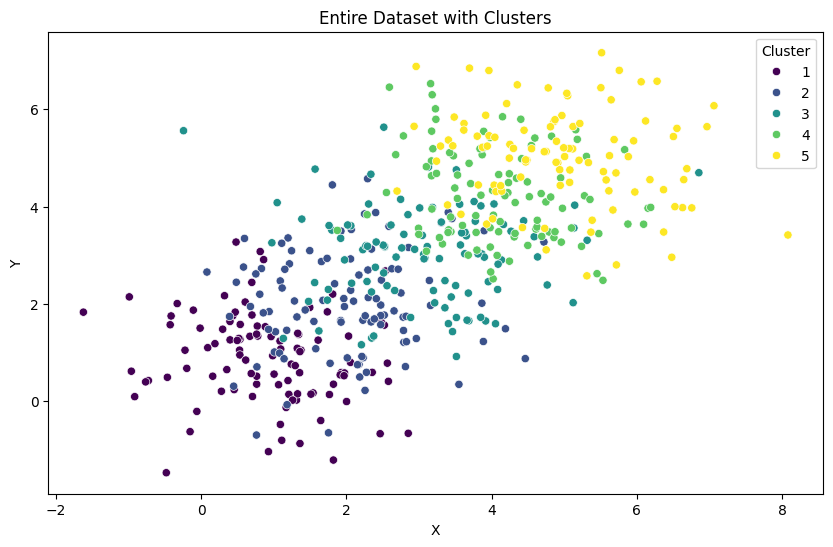

In [10]:
# Visualize the entire dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Cluster', palette='viridis', data=df)
plt.title('Entire Dataset with Clusters')
plt.show()

In [11]:
# Randomly select 3 clusters
selected_clusters = np.random.choice(df['Cluster'].unique(), 3, replace=False)
print("Selected Clusters:", selected_clusters)

# Sample 20 points from each selected cluster
sampled_points = []
for cluster in selected_clusters:
    cluster_data = df[df['Cluster'] == cluster]
    sampled_points.append(cluster_data.sample(20))

# Combine the sampled points
sample = pd.concat(sampled_points)


Selected Clusters: [2 5 3]


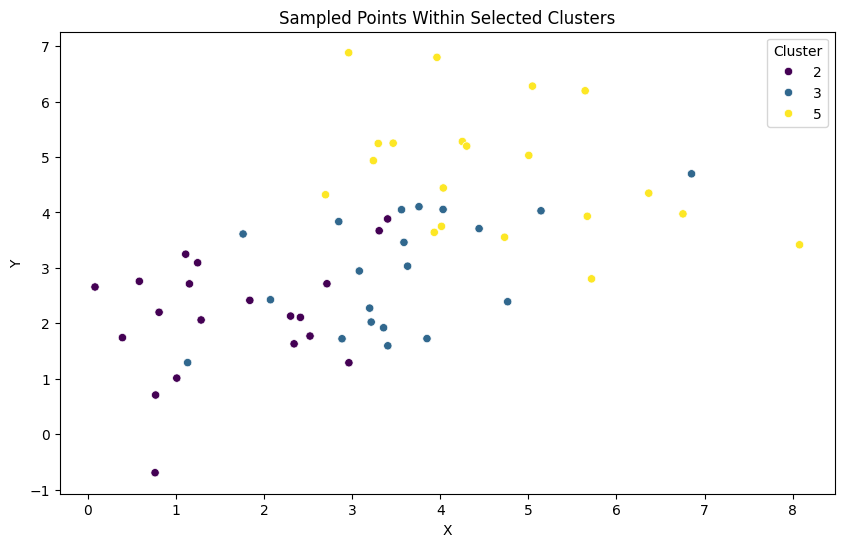

In [12]:
# Visualize the sampled points within the selected clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Cluster', palette='viridis', data=sample)
plt.title('Sampled Points Within Selected Clusters')
plt.show()


**1.5. Multi-Stage Sampling**

Selected Clusters: [4 3 1]


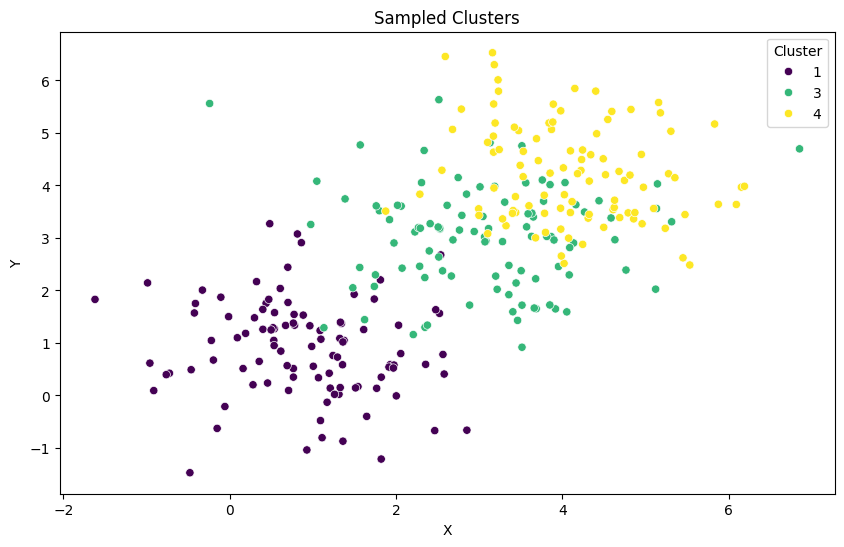

In [13]:
# Randomly select 3 clusters
selected_clusters = np.random.choice(df['Cluster'].unique(), 3, replace=False)
print("Selected Clusters:", selected_clusters)

# Sample all points from the selected clusters (simple random sampling)
sample = df[df['Cluster'].isin(selected_clusters)]

# Visualize the sampled clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Cluster', palette='viridis', data=sample)
plt.title('Sampled Clusters')
plt.show()


# Handling Missing Values

**2. Data Imputation**

In [16]:
df = pd.read_csv('shopping-data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


In [17]:
df.shape

(200, 5)

In [18]:
df.isna().sum()

,0
CustomerID,0
Genre,23
Age,15
Annual Income (k$),8
Spending Score (1-100),0


**2.1 Mean Imputation**

In [19]:
mean_age = df['Age'].mean()
print("\nMean of 'Age' column (ignoring NaNs):", mean_age)


Mean of 'Age' column (ignoring NaNs): 38.108108108108105


In [21]:
df['Age'].fillna(mean_age, inplace=True)

In [22]:
df['Age'].isna().sum()

0

**2.2 Median Imputation**

In [23]:
# Calculate the median of the 'Income' column, ignoring NaN values
median_income = df['Annual Income (k$)'].median()
print("\nMedian of 'Annual Income (k$)' column (ignoring NaNs):", median_income)


Median of 'Annual Income (k$)' column (ignoring NaNs): 63.0


In [24]:
df['Annual Income (k$)'].fillna(median_income, inplace=True)

In [25]:
df['Annual Income (k$)'].isna().sum()

0

**2.3 Mode Imputation**

In [26]:
# Calculate the median of the 'Income' column, ignoring NaN values
mode_gender = df['Genre'].mode()[0]
print("\nMode of 'Genre' column (ignoring NaNs):", mode_gender)


Mode of 'Genre' column (ignoring NaNs): Female


In [27]:
df['Genre'].fillna(mode_gender, inplace=True)

In [28]:
df['Genre'].isna().sum()

0

**3. KNN Imputation**

In [29]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Sample dataset with 3 columns
data = np.array([
    [1.0, 2.0, np.nan],  # Missing value in the third column
    [2.0, 3.5, 1.0],
    [3.0, 4.0, 2.0],
    [4.0, 5.5, np.nan],  # Another missing value in the third column
    [5.0, 6.0, 3.5]
])

# Convert to a DataFrame for visualization (optional)
df = pd.DataFrame(data, columns=["Feature1", "Feature2", "Feature3"])
print("Original DataFrame with missing values:")
print(df)

# Initialize KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the data
imputed_data = imputer.fit_transform(data)

# Convert the result back to a DataFrame (optional)
imputed_df = pd.DataFrame(imputed_data, columns=["Feature1", "Feature2", "Feature3"])

print("\nDataFrame after KNN imputation:")
print(imputed_df)


Original DataFrame with missing values:
   Feature1  Feature2  Feature3
0       1.0       2.0       NaN
1       2.0       3.5       1.0
2       3.0       4.0       2.0
3       4.0       5.5       NaN
4       5.0       6.0       3.5

DataFrame after KNN imputation:
   Feature1  Feature2  Feature3
0       1.0       2.0      1.50
1       2.0       3.5      1.00
2       3.0       4.0      2.00
3       4.0       5.5      2.75
4       5.0       6.0      3.50


**4. Forward and Backward Fill**

In [30]:
import pandas as pd
import numpy as np

# Original DataFrame with missing values
data = {
    "Feature1": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Feature2": [2.0, 3.5, 4.0, 5.5, 6.0],
    "Feature3": [np.nan, 1.0, 2.0, np.nan, 3.5],
}

df = pd.DataFrame(data)
print("Original DataFrame with missing values:")
print(df)

# Forward fill (fill missing values with the previous value)
df_forward_fill = df.fillna(method='ffill')
print("\nDataFrame after Forward Fill:")
print(df_forward_fill)

# Backward fill (fill missing values with the next value)
df_backward_fill = df.fillna(method='bfill')
print("\nDataFrame after Backward Fill:")
print(df_backward_fill)


Original DataFrame with missing values:
   Feature1  Feature2  Feature3
0       1.0       2.0       NaN
1       2.0       3.5       1.0
2       3.0       4.0       2.0
3       4.0       5.5       NaN
4       5.0       6.0       3.5

DataFrame after Forward Fill:
   Feature1  Feature2  Feature3
0       1.0       2.0       NaN
1       2.0       3.5       1.0
2       3.0       4.0       2.0
3       4.0       5.5       2.0
4       5.0       6.0       3.5

DataFrame after Backward Fill:
   Feature1  Feature2  Feature3
0       1.0       2.0       1.0
1       2.0       3.5       1.0
2       3.0       4.0       2.0
3       4.0       5.5       3.5
4       5.0       6.0       3.5


#  Uni, Bi and Multivariate Analysis

**5. Univariate analysis :**

Involves the examination of a single variable. It provides summary statistics and visualizations to understand the distribution, central tendency, and variability of the data

In [31]:
import pandas as pd

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Histogram - Displays the frequency distribution of a single variable

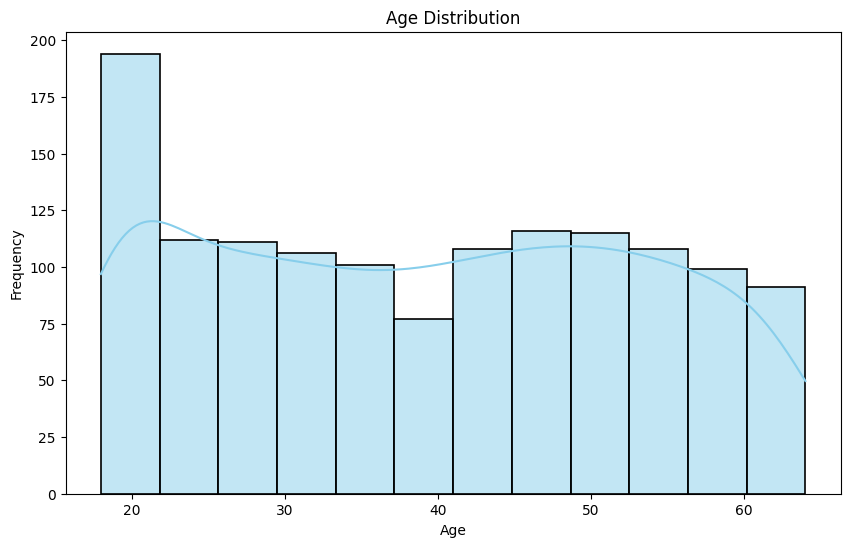

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Box Plot - Shows the distribution of data based on five-number summary: minimum, first quartile, median, third quartile, and maximum

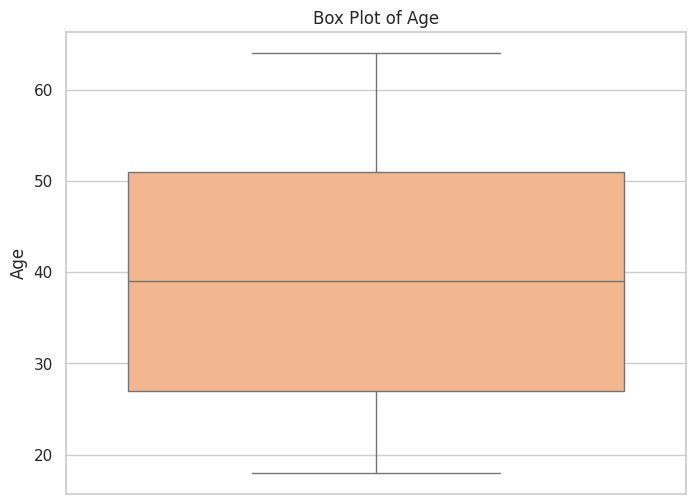

In [34]:
# Box plot for age

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['age'], color=palette[1], saturation=0.8)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

The box plot highlights that the middle 50% of ages (interquartile range) is between approximately 27 and 51 years, with no significant outliers.

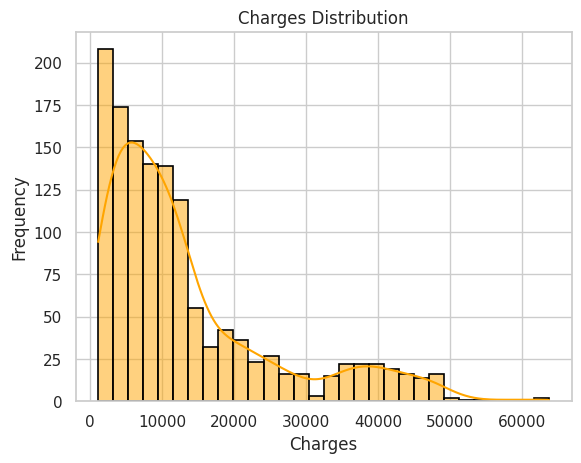

In [35]:
# Histogram for charges
sns.histplot(data['charges'], kde=True,color='orange', edgecolor='black', linewidth=1.2)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Histogram: The distribution of charges is right-skewed, indicating that while most individuals have lower charges, a few have very high charges.

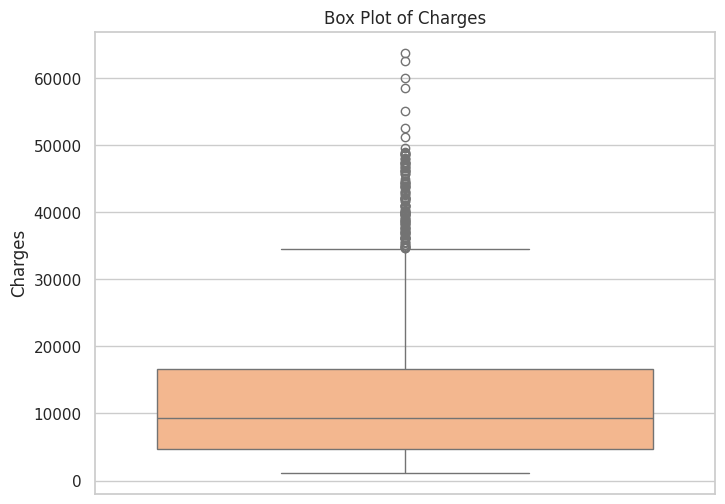

In [36]:
# Box plot for charges

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['charges'], color=palette[1], saturation=0.8)

plt.title('Box Plot of Charges')
plt.ylabel('Charges')
plt.show()

Box Plot: The box plot shows that the interquartile range of charges is relatively wide, with a significant number of outliers on the higher end

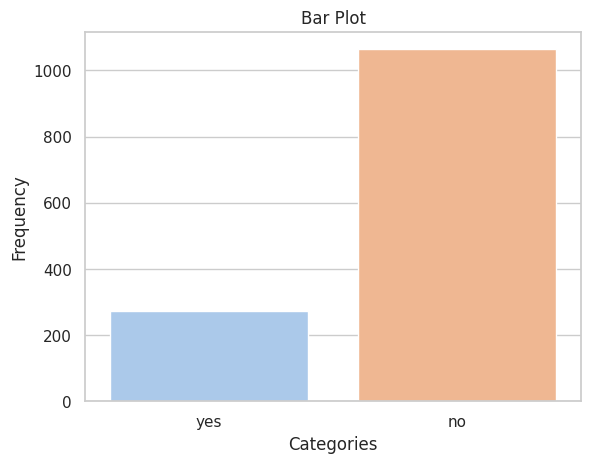

In [ ]:
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

sns.countplot(x=data['smoker'],palette=palette)
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

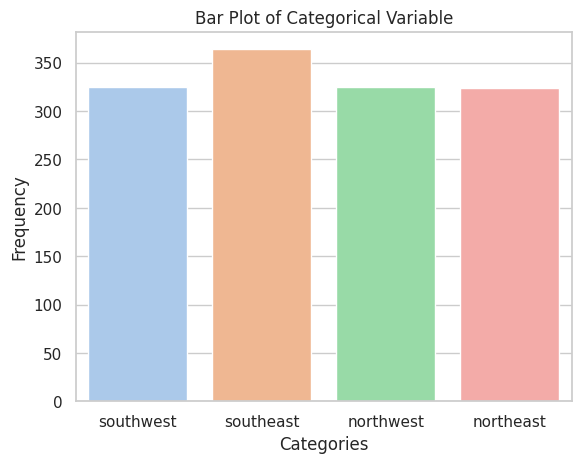

In [ ]:
sns.countplot(x=data['region'],palette=palette)
plt.title('Bar Plot of Categorical Variable')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

**6. Bivariate Analysis**

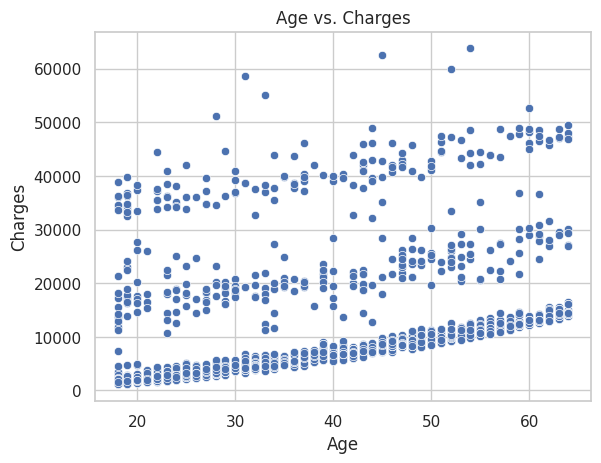

In [ ]:
# Scatter plot for age vs. charges
sns.scatterplot(x=data['age'], y=data['charges'],palette=palette)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Scatter Plot: There is no clear linear relationship between age and charges, but older individuals tend to have a wider range of charges, including some very high values

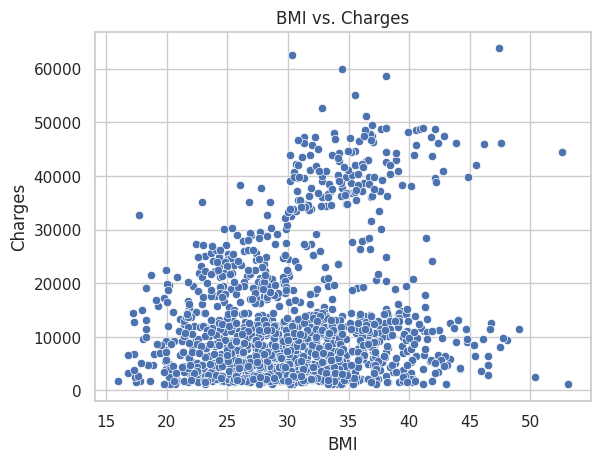

In [ ]:
# Scatter plot for BMI vs. charges
sns.scatterplot(x=data['bmi'], y=data['charges'],palette=palette)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Scatter Plot: There is a slight positive trend, suggesting that individuals with higher BMI may have higher charges, but the relationship is not strong

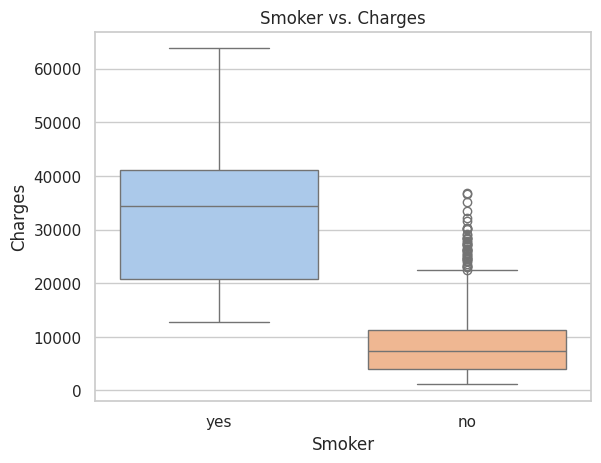

In [ ]:
# Box plot for smoker vs. charges
sns.boxplot(x=data['smoker'], y=data['charges'],palette=palette)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Box Plot: Smokers tend to have significantly higher charges compared to non-smokers, indicating a strong relationship between smoking status and insurance charges.

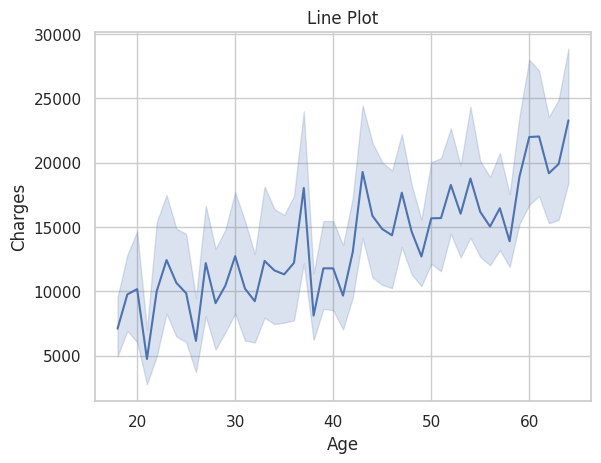

In [ ]:
sns.lineplot(x=data['age'], y=data['charges'],palette=palette)
plt.title('Line Plot')pip install scikit-learn
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data to perform label encoding
data_label_encoded = data.copy()

# Encode categorical variables
label_encoder = LabelEncoder()

# Encoding 'sex' column
data_label_encoded['sex'] = label_encoder.fit_transform(data_label_encoded['sex'])

# Encoding 'smoker' column
data_label_encoded['smoker'] = label_encoder.fit_transform(data_label_encoded['smoker'])

# Encoding 'region' column
data_label_encoded['region'] = label_encoder.fit_transform(data_label_encoded['region'])

# Display the first few rows of the encoded dataset
data_label_encoded.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


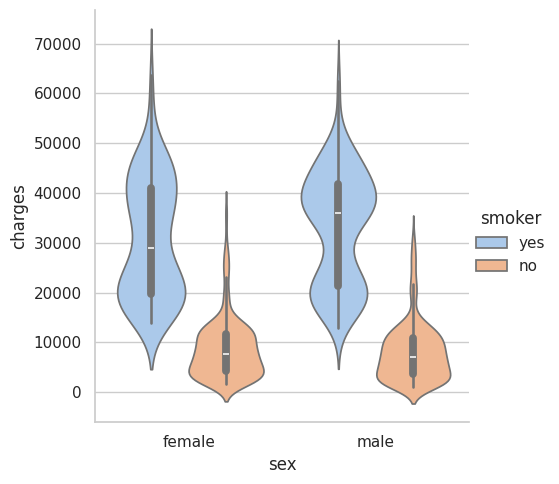

In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = palette)

For both male and female categories, smokers have a higher and more varied distribution of charges compared to non-smokers. This indicates that smoking has a significant impact on increasing medical expenses regardless of sex

**7. Multivariate Analysis**

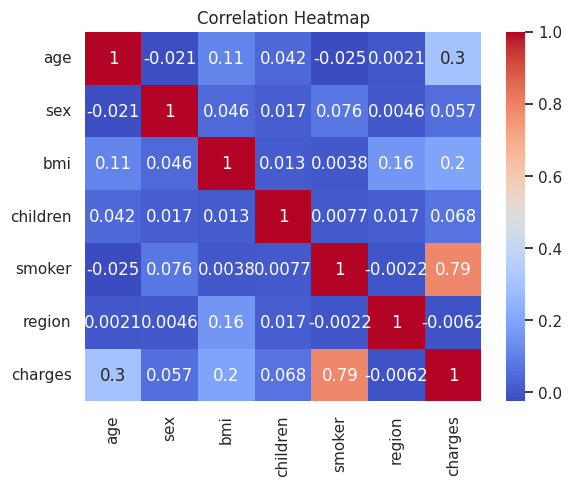

In [ ]:
# Heatmap for correlation matrix
correlation_matrix = data_label_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


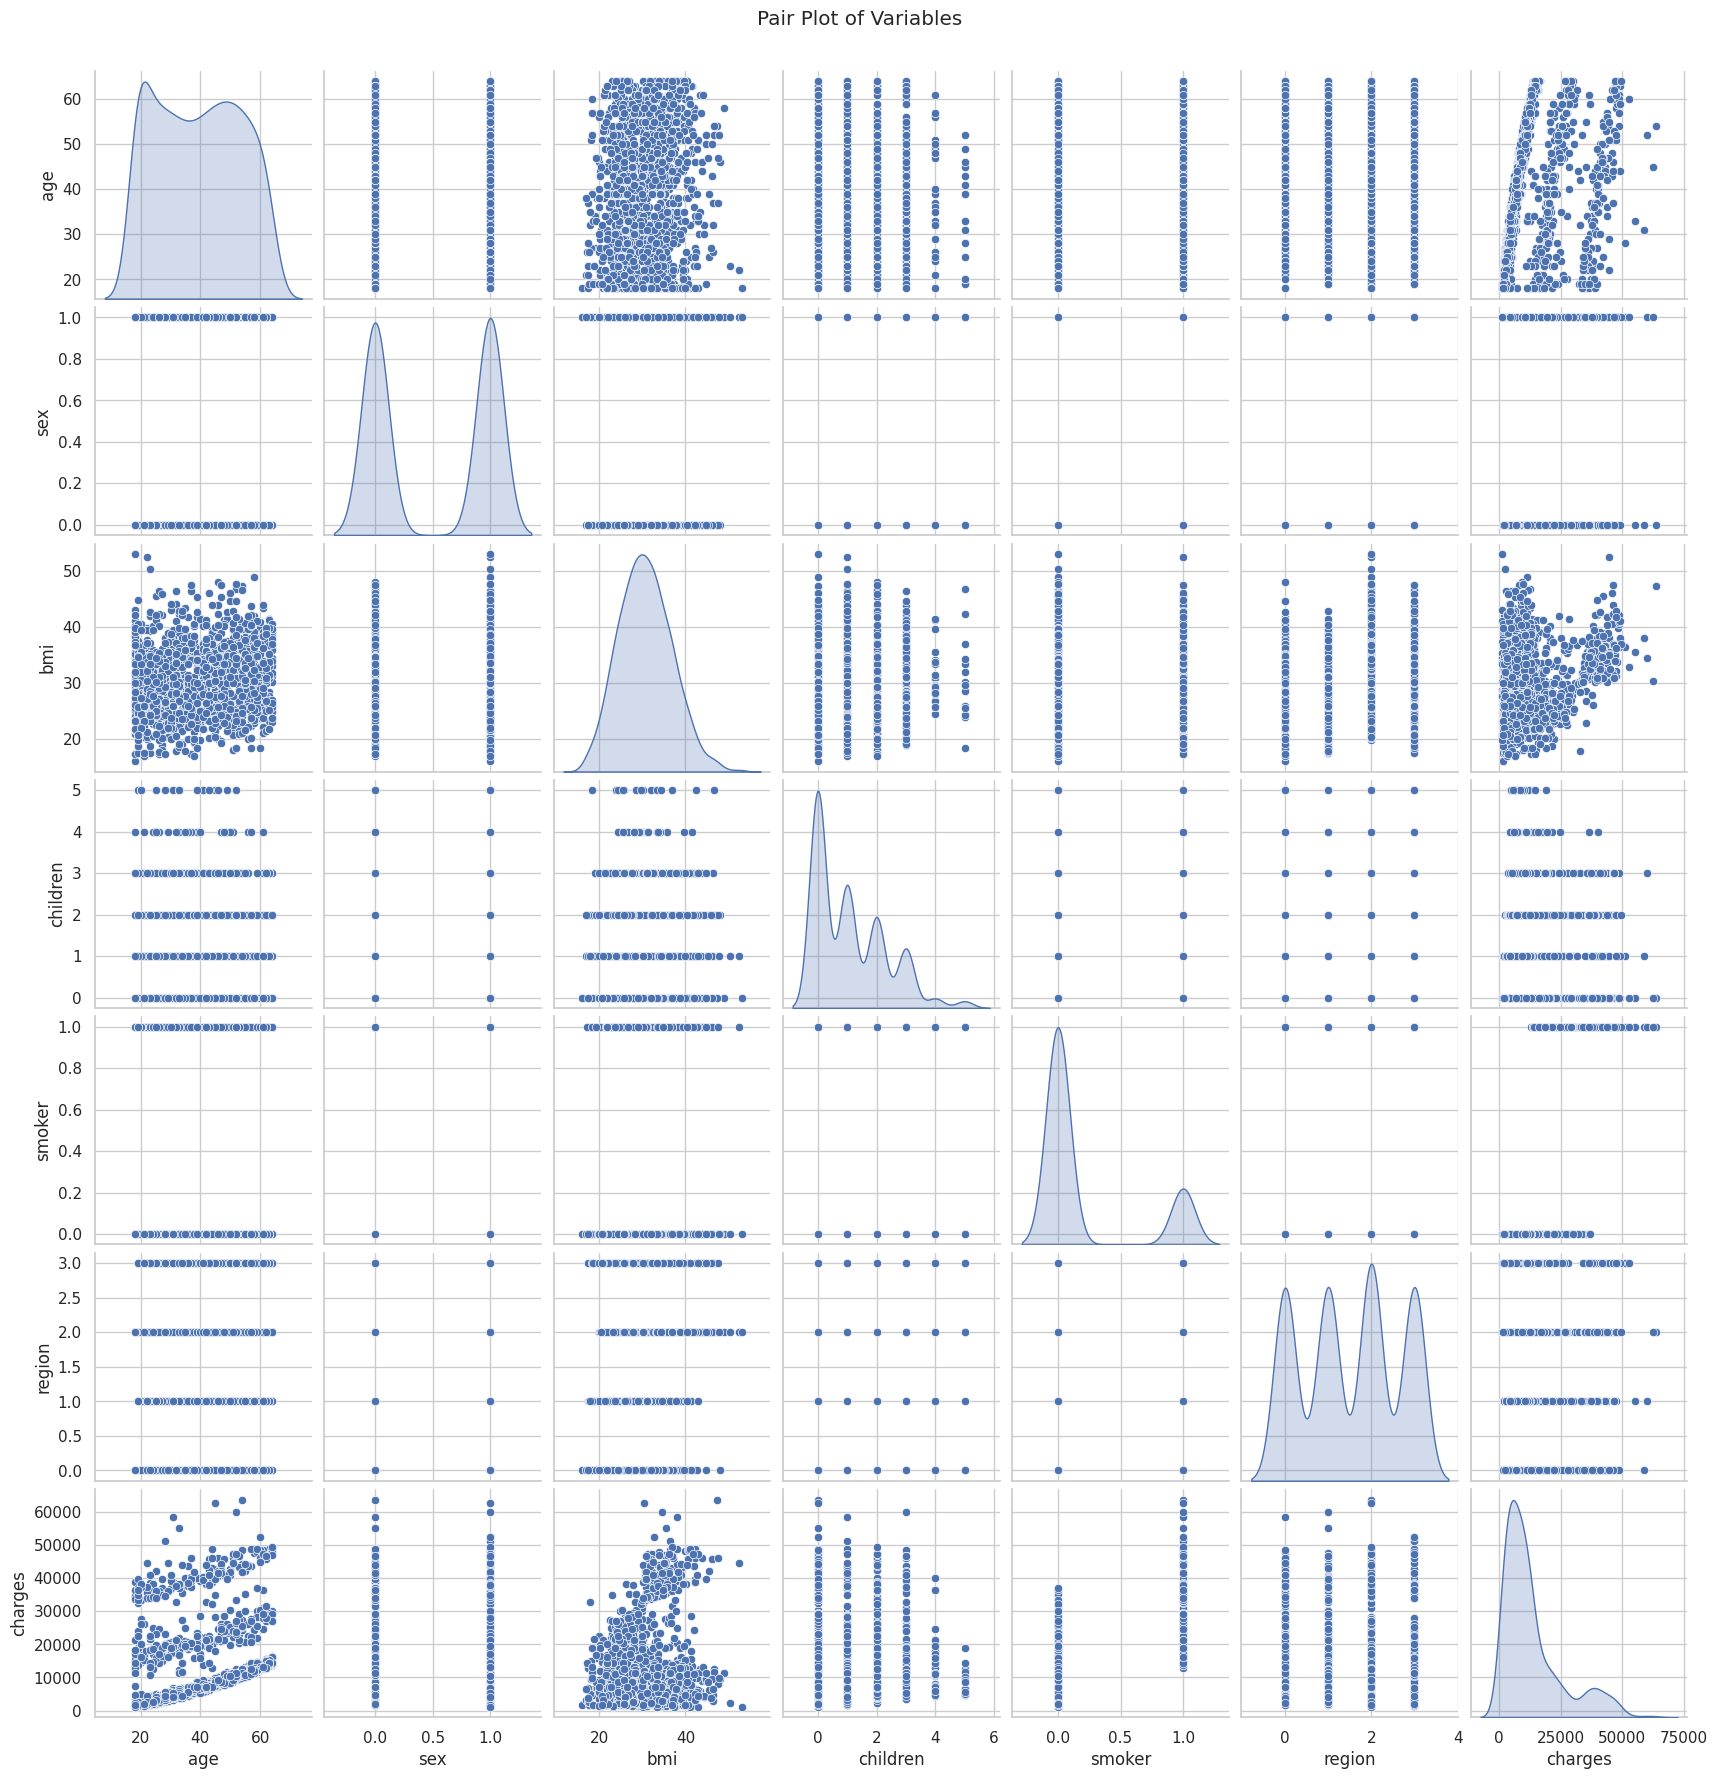

In [ ]:
# Pair plot for all numerical variables
sns.pairplot(data_label_encoded, diag_kind='kde',palette=palette)
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

# PCA

In [37]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features (measurements)
y = iris.target  # Target (species)
#X

In [38]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled

In [39]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=4)  # Specify the number of principal components

# Fit PCA and transform the data
X_pca = pca.fit_transform(X_scaled)


In [40]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


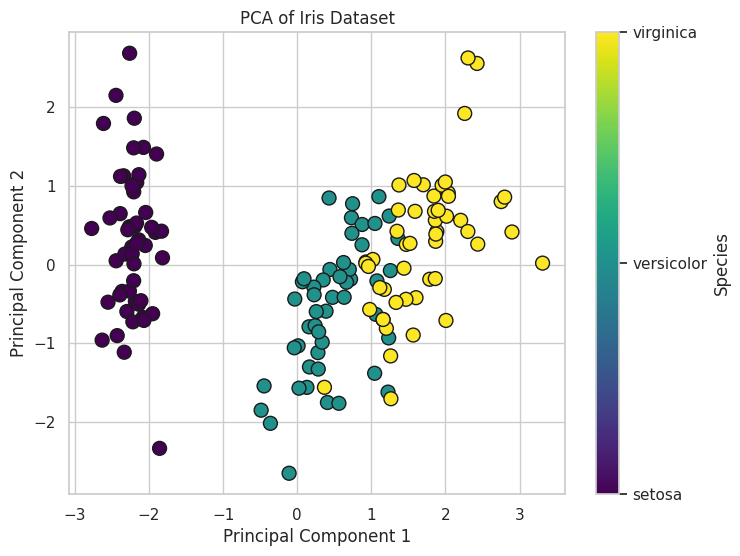

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')

# Adding colorbar with correct label formatting
plt.colorbar(scatter, label='Species', ticks=range(3), format=lambda x, _: iris.target_names[int(x)])
plt.show()


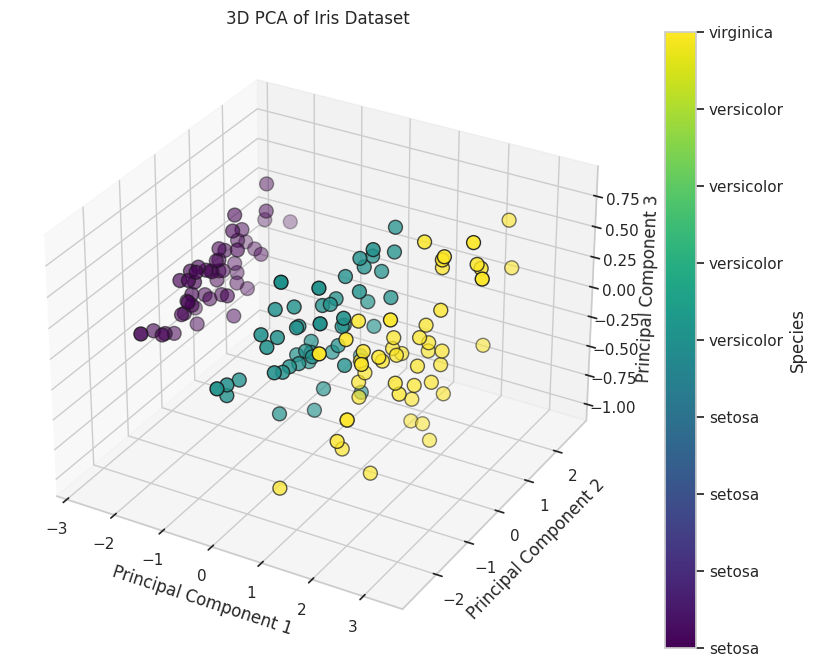

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three principal components
scatter = ax.scatter(
    X_pca[:, 0],  # Principal Component 1
    X_pca[:, 1],  # Principal Component 2
    X_pca[:, 2],  # Principal Component 3
    c=y,          # Color by class
    cmap='viridis', edgecolor='k', s=100
)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Iris Dataset')

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, label='Species', format=lambda x, _: iris.target_names[int(x)])
plt.show()
